#Setup


In [ ]:
pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


Make sure that sklearn version is 0.24.1

In [ ]:
!pip install --user --upgrade scikit-learn==0.24.1
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Requirement already up-to-date: scikit-learn==0.24.1 in /root/.local/lib/python3.6/site-packages (0.24.1)
The scikit-learn version is 0.24.1.


In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

import plotly.io as pio
import seaborn as sb

# to make plotly as default plot engine in pandas
pd.options.plotting.backend = "plotly" #plotly

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Data Raw Description

**Features**
- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

**Target Variable**
- `income`: Income Class (<=50K, >50K)

Source: https://www.kaggle.com/c/udacity-mlcharity-competition/leaderboard

select=census.csv

#Get the data


In [ ]:
import requests
r = requests.get('https://raw.githubusercontent.com/ngoeldner/Machine-Learning-Project/main/finding_donors/census.csv')

In [ ]:
file_path = '/content/census.csv'
f = open(file_path,'wb')
f.write(r.content)

5359441

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


lower_snake_case

In [ ]:
df = df.rename(
    columns={
        'education-num': 'education_num',
        'marital-status': 'marital_status',
        'capital-gain': 'capital_gain',
        'capital-loss': 'capital_loss',
        'hours-per-week': 'hours_per_week',
        'native-country': 'native_country',
        'income': 'y'
    }
)

In [ ]:
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#Data Analysis

In this part, we take a quick glance at the whole dataset, then split it and look more carefully at the training dataset.  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education_num    45222 non-null  float64
 4   marital_status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital_gain     45222 non-null  float64
 10  capital_loss     45222 non-null  float64
 11  hours_per_week   45222 non-null  float64
 12  native_country   45222 non-null  object 
 13  y                45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


So we got more categorical columns than numeric columns, later we will analyse what is the more appropriate cat->num transformation and if we should do any kind of feature engineering besides the cat->num.

In [ ]:
numeric_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

##Split

In [ ]:
df_used = df.copy()

In [ ]:
df_used['y'] = df_used['y'] == '>50K'

In [ ]:
df_used.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,False
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,False
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,False


In [ ]:
X = df_used.drop(['y'], axis=1)
y = df_used['y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_npre, X_test_npre, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_train_npre = pd.concat([pd.DataFrame(X_train_npre),pd.DataFrame(y_train)], axis=1)
df_train_npre

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
7963,32,Private,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,False
26402,45,Private,Assoc-acdm,12.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,66.0,Yugoslavia,False
31411,45,Self-emp-not-inc,11th,7.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,False
13367,39,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,70.0,United-States,False
38742,51,State-gov,HS-grad,9.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,38.0,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26,Private,Some-college,10.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,False
44732,24,Private,Bachelors,13.0,Never-married,Sales,Other-relative,Black,Male,0.0,0.0,50.0,United-States,False
38158,31,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False
860,37,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,99.0,United-States,True


##Analysis

In [ ]:
print(df_train_npre['y'].count())
print(df_train_npre['y'].value_counts(normalize=True))
true_y_prop = df_train_npre['y'].value_counts(normalize=True)[True]
print(true_y_prop)

36177
False    0.753766
True     0.246234
Name: y, dtype: float64
0.24623379495259418


In [ ]:
df_train_npre.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,38.558283,10.117091,1089.335766,87.182962,40.952318
std,13.232872,2.554611,7519.871123,401.695413,11.988401
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Here we got some weird values, for example, working 99 hours/week (14 hours by 7 days in week).
The almost 100K is a possible value in capital gain, but this is clearly an outsider.
Maybe letting this values in the training dataset can have a good influence in the model, unless we know that it was generated from wrong data imputation or mistype kind of error. Lets take a more carefull look.

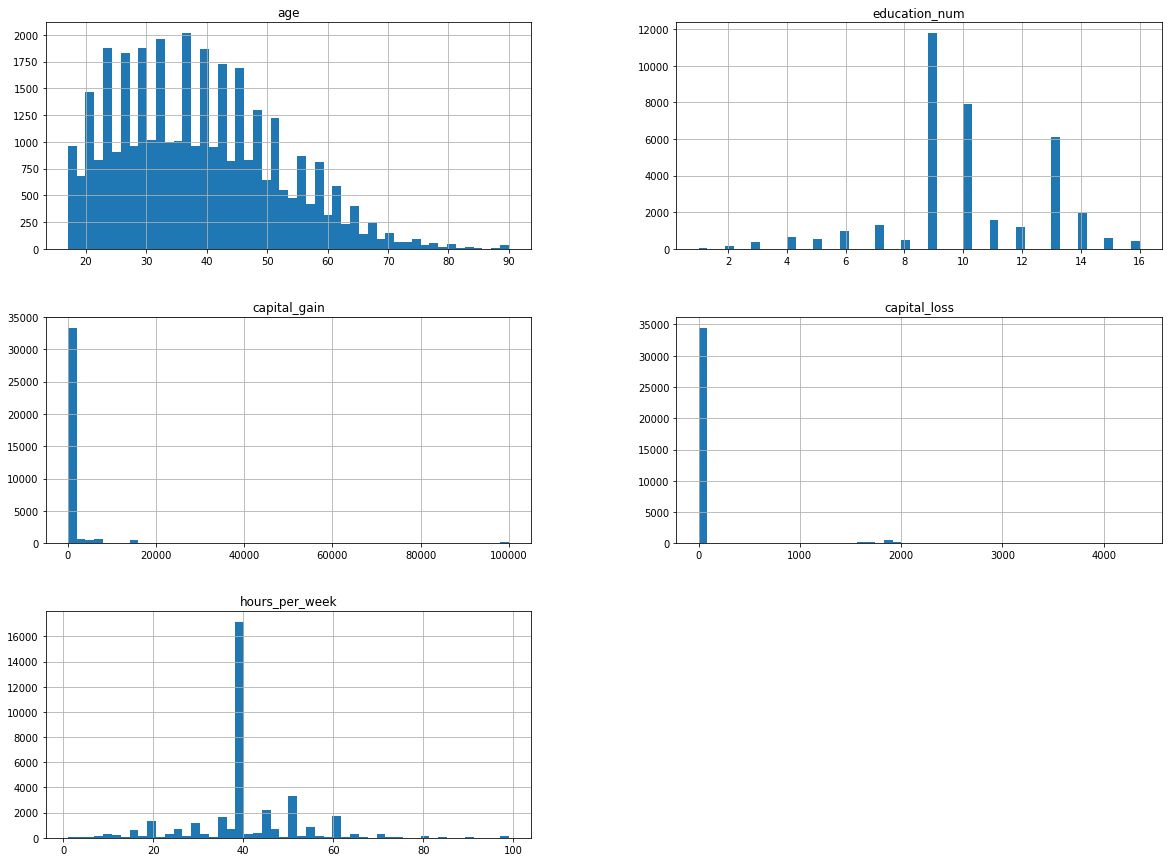

In [ ]:
pd.options.plotting.backend = "matplotlib" #plotly
df_train_npre[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()
pd.options.plotting.backend = "plotly" #plotly

In the next cells, we can notice the huge amount of intances with 0 in capital_gain and in capital_loss

In [ ]:
print(df_train_npre['capital_gain'].value_counts())
print(df_train_npre['capital_gain'].value_counts()[0]/df_train_npre.count()['capital_gain'])

0.0        33182
15024.0      391
7688.0       300
7298.0       282
99999.0      185
           ...  
3432.0         1
2961.0         1
1731.0         1
2387.0         1
7262.0         1
Name: capital_gain, Length: 119, dtype: int64
0.917212593636841


In [ ]:
print(df_train_npre['capital_loss'].value_counts())
print(df_train_npre['capital_loss'].value_counts()[0]/df_train_npre.count()['capital_loss'])

0.0       34488
1902.0      226
1887.0      188
1977.0      186
1485.0       54
          ...  
1421.0        1
2282.0        1
2163.0        1
1510.0        1
4356.0        1
Name: capital_loss, Length: 92, dtype: int64
0.9533128783481217


In [ ]:
df_train_npre.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
7963,32,Private,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,False
26402,45,Private,Assoc-acdm,12.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,66.0,Yugoslavia,False
31411,45,Self-emp-not-inc,11th,7.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,False
13367,39,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,70.0,United-States,False
38742,51,State-gov,HS-grad,9.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,38.0,United-States,False


### Proportion of true values of y in each class

In [ ]:
def plot_true_porcent(column):
    return (
        df_train_npre
        .groupby(
            [column]
        )
        ['y']
        .value_counts(normalize=True)
        .xs(True, level=1)
        .plot(kind='bar')
    )

In [ ]:
df_train_npre.groupby(['workclass'])['y'].value_counts(normalize=True)

workclass          y    
 Federal-gov       False    0.605405
                   True     0.394595
 Local-gov         False    0.718219
                   True     0.281781
 Private           False    0.783652
                   True     0.216348
 Self-emp-inc      True     0.551776
                   False    0.448224
 Self-emp-not-inc  False    0.716634
                   True     0.283366
 State-gov         False    0.735647
                   True     0.264353
 Without-pay       False    0.928571
                   True     0.071429
Name: y, dtype: float64

In [ ]:
plot_true_porcent('workclass')

In [ ]:
plot_true_porcent('education_level')

In [ ]:
df_train_npre['education_level'].unique()

array([' Bachelors', ' Assoc-acdm', ' 11th', ' HS-grad', ' 9th',
       ' Some-college', ' 7th-8th', ' Masters', ' Assoc-voc', ' 10th',
       ' 5th-6th', ' 1st-4th', ' Doctorate', ' Preschool', ' 12th',
       ' Prof-school'], dtype=object)

In [ ]:
plot_true_porcent('marital_status')

In [ ]:
plot_true_porcent('occupation')

In [ ]:
plot_true_porcent('relationship')

In [ ]:
plot_true_porcent('race')

In [ ]:
plot_true_porcent('sex')

In [ ]:
plot_true_porcent('native_country')

# Preprocessing and Feature Engineering

##Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
categorical_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

In [ ]:
numeric_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

###Partial pipeline to get the name of the new features

In [ ]:
partial_pipeline = ColumnTransformer([
        # ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
        # ('edu_level', MyCat2Num('education_level'), ['education_level']),
        # ('nat_country', MyCat2Num('native_country'), ['native_country']),
        
    ], n_jobs = -1)

In [ ]:
partial_pipeline.fit(X_train_npre)

ColumnTransformer(n_jobs=-1,
                  transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['workclass', 'marital_status', 'occupation',
                                  'relationship', 'race', 'sex'])])

In [ ]:
all_cat_names = partial_pipeline.get_feature_names()

In [ ]:
all_cat_names

['cat__x0_ Federal-gov',
 'cat__x0_ Local-gov',
 'cat__x0_ Private',
 'cat__x0_ Self-emp-inc',
 'cat__x0_ Self-emp-not-inc',
 'cat__x0_ State-gov',
 'cat__x0_ Without-pay',
 'cat__x1_ Divorced',
 'cat__x1_ Married-AF-spouse',
 'cat__x1_ Married-civ-spouse',
 'cat__x1_ Married-spouse-absent',
 'cat__x1_ Never-married',
 'cat__x1_ Separated',
 'cat__x1_ Widowed',
 'cat__x2_ Adm-clerical',
 'cat__x2_ Armed-Forces',
 'cat__x2_ Craft-repair',
 'cat__x2_ Exec-managerial',
 'cat__x2_ Farming-fishing',
 'cat__x2_ Handlers-cleaners',
 'cat__x2_ Machine-op-inspct',
 'cat__x2_ Other-service',
 'cat__x2_ Priv-house-serv',
 'cat__x2_ Prof-specialty',
 'cat__x2_ Protective-serv',
 'cat__x2_ Sales',
 'cat__x2_ Tech-support',
 'cat__x2_ Transport-moving',
 'cat__x3_ Husband',
 'cat__x3_ Not-in-family',
 'cat__x3_ Other-relative',
 'cat__x3_ Own-child',
 'cat__x3_ Unmarried',
 'cat__x3_ Wife',
 'cat__x4_ Amer-Indian-Eskimo',
 'cat__x4_ Asian-Pac-Islander',
 'cat__x4_ Black',
 'cat__x4_ Other',
 'cat__x

###Full Pipeline

In [ ]:
class MyCat2Num(BaseEstimator, TransformerMixin):
    def __init__(self, column): # no *args or **kwargs
        self.column = column

    def fit(self, X, y):
        self.df_Xy = pd.concat([X,y], axis=1)
        self.column_y_true = (1-self.df_Xy.groupby([self.column])['y'].value_counts(normalize=True).xs(False, level=1)).sort_values()
        return self

    def transform(self, X, y=None):
      def transform_helper(level):
        try:
          return self.column_y_true[level]
        except:
          return -1
      return X.applymap(transform_helper)

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
        ('edu-level', MyCat2Num('education_level'), ['education_level']),
        ('nat-country', MyCat2Num('native_country'), ['native_country']),
    
    ], n_jobs = -1)

X_train_pre = full_pipeline.fit_transform(X_train_npre, y)
pd.DataFrame(X_train_pre, columns=numeric_columns+all_cat_names+['education_level']+['native_country'], index=X_train_npre.index)

,age,education_num,capital_gain,capital_loss,hours_per_week,cat__x0_ Federal-gov,cat__x0_ Local-gov,cat__x0_ Private,cat__x0_ Self-emp-inc,cat__x0_ Self-emp-not-inc,cat__x0_ State-gov,cat__x0_ Without-pay,cat__x1_ Divorced,cat__x1_ Married-AF-spouse,cat__x1_ Married-civ-spouse,cat__x1_ Married-spouse-absent,cat__x1_ Never-married,cat__x1_ Separated,cat__x1_ Widowed,cat__x2_ Adm-clerical,cat__x2_ Armed-Forces,cat__x2_ Craft-repair,cat__x2_ Exec-managerial,cat__x2_ Farming-fishing,cat__x2_ Handlers-cleaners,cat__x2_ Machine-op-inspct,cat__x2_ Other-service,cat__x2_ Priv-house-serv,cat__x2_ Prof-specialty,cat__x2_ Protective-serv,cat__x2_ Sales,cat__x2_ Tech-support,cat__x2_ Transport-moving,cat__x3_ Husband,cat__x3_ Not-in-family,cat__x3_ Other-relative,cat__x3_ Own-child,cat__x3_ Unmarried,cat__x3_ Wife,cat__x4_ Amer-Indian-Eskimo,cat__x4_ Asian-Pac-Islander,cat__x4_ Black,cat__x4_ Other,cat__x4_ White,cat__x5_ Female,cat__x5_ Male,education_level,native_country
7963,-0.495612,1.128527,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.415367,0.251302
26402,0.486803,0.737073,-0.144863,-0.21704,2.089355,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.263547,0.210526
31411,0.486803,-1.220199,-0.144863,-0.21704,0.754713,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.055470,0.251302
13367,0.033381,-0.437290,-0.144863,-0.21704,2.423016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.160526,0.251302
38742,0.940226,-0.437290,-0.144863,-0.21704,-0.246268,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.160526,0.251302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.949035,-0.045836,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.204717,0.251302
44732,-1.100176,1.128527,-0.144863,-0.21704,0.754713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.415367,0.251302
38158,-0.571183,-0.045836,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.204717,0.251302
860,-0.117760,-0.437290,-0.144863,-0.21704,4.842054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.160526,0.251302


#Model Training

In this part, we train different models using the GridSearchCV to search for the best hyperparameters. Since the dataset is not very large, we can test many combinations of hyperparameters for each model.

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
#we can't set random_state, for example StratifiedKFold(n_splits=5, shuffle=False, random_state=0), 
# because it raises an error since random_state may only be set if shuffle=True. This is why we do not give a seed to random_state 
# and we don't suffle the data because it has already been shuffled in train_test_split 
skf = StratifiedKFold(n_splits=5)

##SGDClassifier

In [ ]:
parameters = {'estimator__l1_ratio':[0.025, 0.05, 0.1, 0.3, 0.9, 1], 'estimator__alpha':[0.00001, 0.0001, 0.001]}
sgd_class = SGDClassifier(random_state=0, max_iter=200, penalty='elasticnet')
preproc_sgd_class = Pipeline(steps= [('preproc', full_pipeline),('estimator', sgd_class)] , verbose=3)
sgd_class_gscv = GridSearchCV(estimator=preproc_sgd_class, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                              error_score='raise', return_train_score=True, verbose=3)

In [ ]:
sgd_class_gscv.fit(X_train_npre, y_train)
print(sgd_class_gscv.best_params_)
print(sgd_class_gscv.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.5s
{'estimator__alpha': 0.0001, 'estimator__l1_ratio': 0.05}
0.8999891506432934


In [ ]:
pd.concat([pd.DataFrame(sgd_class_gscv.cv_results_["params"]),
           pd.DataFrame(sgd_class_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(sgd_class_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(sgd_class_gscv.cv_results_["mean_train_score"], columns=["mean_train_score"]),
           pd.DataFrame(sgd_class_gscv.cv_results_["std_test_score"], columns=["std_test_score"]),
           pd.DataFrame(sgd_class_gscv.cv_results_["std_train_score"], columns=["std_train_score"])],axis=1)

,estimator__alpha,estimator__l1_ratio,rank_test_score,mean_test_score,mean_train_score,std_test_score,std_train_score
0,0.00001,0.025,13,0.893977,0.896178,0.002624,0.003413
1,0.00001,0.050,14,0.892336,0.893486,0.002613,0.000761
2,0.00001,0.100,18,0.888697,0.890113,0.003307,0.004100
3,0.00001,0.300,16,0.891576,0.893155,0.003336,0.003614
4,0.00001,0.900,17,0.890838,0.892505,0.008273,0.005384
5,0.00001,1.000,15,0.892084,0.893288,0.006889,0.005019
6,0.00010,0.025,8,0.898679,0.900111,0.003403,0.001740
7,0.00010,0.050,1,0.899989,0.900788,0.001628,0.001004
8,0.00010,0.100,3,0.899633,0.900849,0.002593,0.001061
9,0.00010,0.300,12,0.897553,0.899132,0.001960,0.002085


##Logistc Regression

In [ ]:
parameters = {'estimator__l1_ratio':[0.05, 0.1, 0.3,0.6, 0.9, 1], 'estimator__C':[0.1,1,10]}
log_reg = LogisticRegression(solver='saga',penalty='elasticnet', random_state=0, max_iter=200)
preproc_logreg = Pipeline(steps= [('preproc', full_pipeline),('estimator', log_reg)] , verbose=3)
log_reg_gscv = GridSearchCV(estimator=preproc_logreg, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                            error_score='raise', return_train_score=True, verbose=3)

In [ ]:
log_reg_gscv.fit(X_train_npre, y_train)
print(log_reg_gscv.best_params_)
print(log_reg_gscv.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   9.4s
{'estimator__C': 1, 'estimator__l1_ratio': 0.05}
0.9026324667393995


/root/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
pd.concat([pd.DataFrame(log_reg_gscv.cv_results_["params"]),
           pd.DataFrame(log_reg_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(log_reg_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(log_reg_gscv.cv_results_["mean_train_score"], columns=["mean_train_score"]),
           pd.DataFrame(log_reg_gscv.cv_results_["std_test_score"], columns=["std_test_score"]),
           pd.DataFrame(log_reg_gscv.cv_results_["std_train_score"], columns=["std_train_score"])],axis=1)

,estimator__C,estimator__l1_ratio,rank_test_score,mean_test_score,mean_train_score,std_test_score,std_train_score
0,0.1,0.05,13,0.902523,0.903468,0.002285,0.000551
1,0.1,0.10,14,0.902512,0.903455,0.002274,0.000551
2,0.1,0.30,15,0.902442,0.903384,0.002213,0.000551
3,0.1,0.60,16,0.902307,0.903230,0.002160,0.000535
4,0.1,0.90,17,0.902198,0.903076,0.002165,0.000508
5,0.1,1.00,18,0.902159,0.903022,0.002175,0.000500
6,1.0,0.05,1,0.902632,0.903864,0.002306,0.000544
7,1.0,0.10,2,0.902629,0.903865,0.002306,0.000544
8,1.0,0.30,3,0.902623,0.903868,0.002304,0.000542
9,1.0,0.60,4,0.902614,0.903873,0.002297,0.000540


##SVM


###Linear

In [ ]:
parameters = {'estimator__loss':['squared_epsilon_insensitive'], 'estimator__C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
# parameters = {'estimator__loss':['squared_epsilon_insensitive'], 'estimator__C':[1]}
lin_svc = LinearSVC(dual=False, random_state=0)
preproc_linsvc = Pipeline(steps= [('preproc', full_pipeline),('estimator', lin_svc)])
lin_svc_gscv = GridSearchCV(estimator=preproc_linsvc, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                            error_score='raise', return_train_score=True, verbose=3)

In [ ]:
lin_svc_gscv.fit(X_train_npre, y_train)
print(lin_svc_gscv.best_params_)
print(lin_svc_gscv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'estimator__C': 0.01, 'estimator__loss': 'squared_epsilon_insensitive'}
0.8929176507490396


In [ ]:
pd.concat([pd.DataFrame(lin_svc_gscv.cv_results_["params"]),
           pd.DataFrame(lin_svc_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(lin_svc_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(lin_svc_gscv.cv_results_["mean_train_score"], columns=["mean_train_score"]),
           pd.DataFrame(lin_svc_gscv.cv_results_["std_test_score"], columns=["std_test_score"]),
           pd.DataFrame(lin_svc_gscv.cv_results_["std_train_score"], columns=["std_train_score"])],axis=1)

,estimator__C,estimator__loss,rank_test_score,mean_test_score,mean_train_score,std_test_score,std_train_score
0,0.00001,squared_epsilon_insensitive,9,0.871605,0.871784,0.002201,0.000431
1,0.00010,squared_epsilon_insensitive,8,0.886097,0.886452,0.002174,0.000420
2,0.00100,squared_epsilon_insensitive,3,0.892682,0.893395,0.002085,0.000452
3,0.01000,squared_epsilon_insensitive,1,0.892918,0.893930,0.002112,0.000477
4,0.10000,squared_epsilon_insensitive,2,0.892720,0.893937,0.002143,0.000486
5,1.00000,squared_epsilon_insensitive,4,0.892664,0.893926,0.002142,0.000488
6,10.00000,squared_epsilon_insensitive,7,0.892655,0.893926,0.002143,0.000489
7,100.00000,squared_epsilon_insensitive,5,0.892658,0.893926,0.002144,0.000487
8,1000.00000,squared_epsilon_insensitive,6,0.892657,0.893925,0.002142,0.000489


###Nonlinear

In [ ]:
# parameters = [{'kernel':['poly'],    'C':[0.001,0.01,0.1,1,10,100,300], 'degree':[2,3,4,5,6,7,8]},
#               {'kernel':['rbf'],     'C':[0.001,0.01,0.1,1,10,100,300]},
#               {'kernel':['sigmoid'], 'C':[0.001,0.01,0.1,1,10,100,300]}
#               ]
parameters = [{'estimator__kernel':['poly'],    'estimator__C':[0.1,], 'estimator__degree':[3,]},
              {'estimator__kernel':['rbf'],     'estimator__C':[0.1,]},
              {'estimator__kernel':['sigmoid'], 'estimator__C':[0.1,]}
              ]
nlin_svc = SVC()
preproc_nlinsvc = Pipeline(steps= [('preproc', full_pipeline),('estimator', nlin_svc)] , verbose=3)
nlin_svc_gscv = GridSearchCV(estimator=preproc_nlinsvc, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                             error_score='raise', verbose=3)

In [ ]:
nlin_svc_gscv.fit(X_train_npre, y_train)
print(nlin_svc_gscv.best_params_)
print(nlin_svc_gscv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total= 1.0min
{'estimator__C': 0.1, 'estimator__kernel': 'rbf'}
0.8989443151247919


In [ ]:
pd.concat([pd.DataFrame(nlin_svc_gscv.cv_results_["params"]),
           pd.DataFrame(nlin_svc_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(nlin_svc_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(nlin_svc_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__C,estimator__degree,estimator__kernel,rank_test_score,mean_test_score,std_test_score
0,0.1,3.0,poly,2,0.888968,0.002124
1,0.1,NaN,rbf,1,0.898944,0.001226
2,0.1,NaN,sigmoid,3,0.799455,0.003742


##Random Forest

In [ ]:
# parameters = {'max_leaf_nodes':[700, 800,850, 900,950, 1000]}
parameters = {'estimator__n_estimators':[100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=0, max_leaf_nodes=950)
preproc_rf = Pipeline(steps= [('preproc', full_pipeline),('estimator', rf)] , verbose=4)
rf_gscv = GridSearchCV(estimator=preproc_rf, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                       error_score='raise', verbose=4)

In [ ]:
rf_gscv.fit(X_train_npre, y_train)
print(rf_gscv.best_params_)
print(rf_gscv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   8.8s
{'estimator__n_estimators': 300}
0.9153413929112661


In [ ]:
pd.concat([pd.DataFrame(rf_gscv.cv_results_["params"]),
           pd.DataFrame(rf_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(rf_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(rf_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__n_estimators,rank_test_score,mean_test_score,std_test_score
0,100,4,0.915001,0.002563
1,200,3,0.915189,0.002823
2,300,1,0.915341,0.002849
3,400,2,0.915340,0.002748


##Extra-Trees

In [ ]:
# parameters = {'max_leaf_nodes':[1500, 1750, 2000, 2250, 2500]}
parameters = {'estimator__n_estimators':[100, 200, 300, 400]}
et = ExtraTreesClassifier(random_state=0, max_leaf_nodes=2000)
preproc_et = Pipeline(steps= [('preproc', full_pipeline),('estimator', et)] , verbose=3)
et_gscv = GridSearchCV(estimator=preproc_et, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                       error_score='raise', verbose=3)

In [ ]:
et_gscv.fit(X_train_npre, y_train)
print(et_gscv.best_estimator_)
print(et_gscv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=  15.8s
Pipeline(steps=[('preproc',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['workclass',
                                                   'marital_status',
           

In [ ]:
pd.concat([pd.DataFrame(et_gscv.cv_results_["params"]),
           pd.DataFrame(et_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(et_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(et_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__n_estimators,rank_test_score,mean_test_score,std_test_score
0,100,4,0.901793,0.003341
1,200,3,0.902250,0.003354
2,300,2,0.902450,0.003322
3,400,1,0.902556,0.003256


##AdaBoost

In [ ]:
parameters = {'estimator__n_estimators':[100,300], 'estimator__learning_rate' : [1,2,3]}
dt = DecisionTreeClassifier(random_state=0)
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
preproc_ada = Pipeline(steps= [('preproc', full_pipeline),('estimator', ada)] , verbose=4)
ada_gscv = GridSearchCV(estimator=preproc_ada, param_grid=parameters, n_jobs=-1, cv=skf, scoring='roc_auc',
                        error_score='raise', verbose=3)

In [ ]:
ada_gscv.fit(X_train_npre, y_train)
print(ada_gscv.best_estimator_)
print(ada_gscv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=  17.0s
Pipeline(steps=[('preproc',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['workclass',
                                                   'marital_status',
           

In [ ]:
pd.concat([pd.DataFrame(ada_gscv.cv_results_["params"]),
           pd.DataFrame(ada_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(ada_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(ada_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__learning_rate,estimator__n_estimators,rank_test_score,mean_test_score,std_test_score
0,1,100,1,0.876702,0.002721
1,1,300,2,0.870651,0.002703
2,2,100,3,0.826739,0.004180
3,2,300,4,0.826143,0.003574
4,3,100,6,0.812117,0.011178
5,3,300,5,0.812220,0.011181


##Gradient Boosting

In [ ]:
parameters = {'estimator__n_estimators':[400, 500],'estimator__max_depth':[2,3], 'estimator__learning_rate' : [0.1, 1]}
gb = GradientBoostingClassifier(random_state=0, loss='deviance', subsample=0.8)  
preproc_gb = Pipeline(steps= [('preproc', full_pipeline),('estimator', gb)] , verbose=4)
gb_gscv = GridSearchCV(estimator=preproc_gb, param_grid=parameters,  n_jobs=-1, cv=skf, scoring='roc_auc',
                       error_score='raise', verbose=4)

In [ ]:
gb_gscv.fit(X_train_npre, y_train)
print(gb_gscv.best_params_)
print(gb_gscv.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=  33.7s
{'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 500}
0.9249179325978168


In [ ]:
pd.concat([pd.DataFrame(gb_gscv.cv_results_["params"]),
           pd.DataFrame(gb_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(gb_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(gb_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__learning_rate,estimator__max_depth,estimator__n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.1,2,400,4,0.922041,0.002176
1,0.1,2,500,3,0.923293,0.002158
2,0.1,3,400,2,0.924830,0.001951
3,0.1,3,500,1,0.924918,0.001861
4,1.0,2,400,6,0.919046,0.001449
5,1.0,2,500,5,0.919149,0.001367
6,1.0,3,400,7,0.906994,0.003375
7,1.0,3,500,8,0.903400,0.006089


##XGBoost

In [ ]:
parameters = {
    'estimator__n_estimators'      : [500], #400],
     "estimator__eta"              : [0.05],# 0.10, 1],#0.15, 0.20, 0.25, 0.30 ],
     "estimator__max_depth"        : [4],#3, 5, 6, 8],#, 10, 12, 15],
     "estimator__gamma"            : [0.2],# 0.0,0.2 , 0.3, 0.4 ],
     #"colsample_bytree" : [ 0.3]#, 0.4, 0.5 , 0.7 ]
}
xgb = XGBClassifier(random_state=0)
preproc_xgb = Pipeline(steps= [('preproc', full_pipeline),('estimator', xgb)] , verbose=4)
xgb_gscv = GridSearchCV(estimator=preproc_xgb, param_grid=parameters,  n_jobs=-1, cv=skf, scoring='roc_auc',
                        error_score='raise', return_train_score=True, verbose=4)

In [ ]:
xgb_gscv.fit(X_train_npre, y_train)
print(xgb_gscv.best_params_)
print(xgb_gscv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.6s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=  27.0s
{'estimator__eta': 0.05, 'estimator__gamma': 0.2, 'estimator__max_depth': 4, 'estimator__n_estimators': 500}
0.9270605153713147


In [ ]:
pd.concat([pd.DataFrame(xgb_gscv.cv_results_["params"]),
           pd.DataFrame(xgb_gscv.cv_results_["rank_test_score"], columns=["rank_test_score"]),
           pd.DataFrame(xgb_gscv.cv_results_["mean_test_score"], columns=["mean_test_score"]),
           pd.DataFrame(xgb_gscv.cv_results_["std_test_score"], columns=["std_test_score"])],axis=1)

,estimator__eta,estimator__gamma,estimator__max_depth,estimator__n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.05,0.2,4,500,1,0.927061,0.001429


#Final Evaluation, Final Training and Saving the Model 

We have chosen the SGDClassifier for the final model because it presented a good roc_auc score, which was not so different from the score of a much more complex model, the XGBoost. Also, the SGDClassifier allows online learning.

Here, we evaluate the final model in the test dataset. Then, we train the SGDClassifier in the entire dataset and export it to a file.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.base import clone

In [ ]:
best_model = sgd_class_gscv.best_estimator_
y_pred = best_model.predict(X_test_npre)
roc_auc_score(y_test, y_pred)

0.772877171495794

In [ ]:
sgd_class_gscv.best_params_

{'estimator__alpha': 0.0001, 'estimator__l1_ratio': 0.05}

In [ ]:
final_model = clone(sgd_class_gscv.best_estimator_)

In [ ]:
final_model.fit(X, y)

[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.7s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.5s


Pipeline(steps=[('preproc',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex']),
                                                 ('edu-level',
 

In [ ]:
import joblib
filename = 'sgd_model.sav'
joblib.dump(final_model, filename)

['sgd_model.sav']

In [ ]:
edu_df_Xy = pd.concat([X['education_level'],y], axis=1)
edu_y_true = (1-edu_df_Xy.groupby(['education_level'])['y'].value_counts(normalize=True).xs(False, level=1)).sort_values()

nat_df_Xy = pd.concat([X['native_country'],y], axis=1)
nat_y_true = (1-nat_df_Xy.groupby(['native_country'])['y'].value_counts(normalize=True).xs(False, level=1)).sort_values()

def func_edu_helper(level):
  try:
    return edu_y_true[level]
  except:
    return -1

def func_nat_helper(level):
  try:
    return nat_y_true[level]
  except:
    return -1

In [ ]:
X_new_edu = X['education_level'].map(func_edu_helper)
X_new = X.copy()
X_new['education_level'] = X_new_edu

X_new_nat = X['native_country'].map(func_nat_helper)
X_new = X.copy()
X_new['native_country'] = X_new_nat


In [ ]:
deploy_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ], n_jobs = -1)

In [ ]:
deploy_sgd_class = SGDClassifier(random_state=0, max_iter=200, penalty='elasticnet',alpha= 0.0001, l1_ratio= 0.05)
deploy_preproc_sgd_class = Pipeline(steps= [('preproc', deploy_pipeline),('estimator', deploy_sgd_class)] , verbose=3)

In [ ]:
deploy_preproc_sgd_class.fit(X_new, y)

[Pipeline] ........... (step 1 of 2) Processing preproc, total=   1.9s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s


Pipeline(steps=[('preproc',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('estimator',
                 SGDClassifier(

In [ ]:
import pickle
sgd_class_model = deploy_preproc_sgd_class
# Save to file in the current working directory
pkl_filename = "sgd_class_.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sgd_class_model, file)
#load file
with open(pkl_filename,'rb') as io:
    loaded_model=pickle.load(io)

In [ ]:
loaded_model.predict(X)

array([False,  True, False, ...,  True, False,  True])

In [ ]:
import json
edu_y_true.to_json('edu.json')
nat_y_true.to_json('nat.json')